<a href="https://colab.research.google.com/github/Ankur241289/Capstone-Project---EDA-on-Play-Store-App-Review-Analysis/blob/master/EDA_Play_Store_App_Review_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Exploratory Data Analysis on Play Store App Review



##### **Project Type**    - EDA on Play Store App Review Dataset
##### **Contribution**    - Individual
##### **Team Member 1 -** Ankur Singh

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/Ankur241289/Capstone-Project---EDA-on-Play-Store-App-Review-Analysis

# **Problem Statement**


**Write Problem Statement Here.**

1.   
2.   List item
3.   



#### **Define Your Business Objective?**

Answer Here.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
# Import Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-pastel')
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [3]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data_location = '/content/drive/MyDrive/AlmaBetter Full Stack Data Science/Module 1 - Python for Data Science/Capstone Project 1 Play Store App Review Analysis/'

In [5]:
play_store_main_df = pd.read_csv(data_location + 'Play Store Data.csv')
user_review_main_df = pd.read_csv(data_location + 'User Reviews.csv')


### Dataset First View

In [6]:
# Dataset First Look

# Let us take an initial look at our first dataset i.e the play store data
play_store_main_df.head(5)

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

* In our first dataset i.e the play_store_main_df there are 13 columns. 
* It will be very interesting to see relation between these different variables and how they affect the decision of customers.




In [7]:
# Now we will see our second dataset i.e the user review data

user_review_main_df.head(10)

App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
2  10 Best Foods for You                                                NaN   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   
5  10 Best Foods for You                                           Best way   
6  10 Best Foods for You                                            Amazing   
7  10 Best Foods for You                                                NaN   
8  10 Best Foods for You                               Looking forward app,   
9  10 Best Foods for You              It helpful site ! It help foods get !   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
0  Positive                1.00                0.533333  
1  Positive                0.25                0.288462  
2       NaN                 NaN                     NaN  
3  Positive                0.40                0.875000  
4  Positive                1.00                0.300000  
5  Positive                1.00                0.300000  
6  Positive                0.60                0.900000  
7       NaN                 NaN                     NaN  
8   Neutral                0.00                0.000000  
9   Neutral                0.00                0.000000

* The second dataset i.e the user_review_main_df contains only 5 columns, which are majorly focussed on the review given by users, their sentiment (whether positive or negetive) and sentiment polarity.

## We have two datasets on our hands to analyze. 
* The 1st dataset i.e **play_store_main_df** contain details about the applications available on Google Playstore.
* The second dataset i.e **user_review_main_df** contain the reviews uploaded by users after downloading and using the applications.

## During the first phase when we are trying to understand our data & its shape, we will analyze the two datasets seperately. And once we enter data wrangling and data visualization phase of our project, we will merge the two datasets on the basis on application name and perform further analysis on combined dataset.

### Dataset Rows & Columns count

In [8]:
# Dataset Rows & Columns count

play_store_main_df.shape

(10841, 13)

In [9]:
user_review_main_df.shape

(64295, 5)

* There are 13 Columns and 10841 rows in Play Store Data.

* There are 5 Columns and 64295 rows in User Review Data.

✋ 
### Before diving into dataset and dealing with duplicate and null values, we will create copies of our main datasets so that we do not change our original data by mistake.

### We will perform all the further operations on copied datasets.

In [10]:
play_store_df = play_store_main_df.copy()
user_review_df = user_review_main_df.copy()

### Dataset Information

In [11]:
# Dataset Info

# Play Store Data Info
play_store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


**In Play Store Dataset:**
* Column **Rating** contains a lot of null values. 
* Other columns also contain null values, but they are very few in numbers.
* We will deal with the Null Values in later part of the project.

In [12]:
# User Review Data Info
user_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


**In User Review Dataset:**
* All the columns, except the App name column, contains null values.

#### Duplicate Values

### 1. Dealing with the Duplicate Values from PLay Store Data

In [13]:
# Dataset Duplicate Value Count

# Defining a function of get duplicated value counts
def get_duplicate_value_count(df):
  duplicate_values = df[df.duplicated()]
  return print(f'Number of Duplicated values are {duplicate_values.count()} ' )

In [14]:
# Duplicated values in play store data
get_duplicate_value_count(play_store_df['App'])

Number of Duplicated values are 1181 


In [15]:
# Lets visualize some duplicate values

play_store_df[play_store_df['App']== 'Quick PDF Scanner + OCR FREE']


App  Category  Rating Reviews  \
222  Quick PDF Scanner + OCR FREE  BUSINESS     4.2   80805   
229  Quick PDF Scanner + OCR FREE  BUSINESS     4.2   80805   
285  Quick PDF Scanner + OCR FREE  BUSINESS     4.2   80804   

                   Size    Installs  Type Price Content Rating    Genres  \
222  Varies with device  5,000,000+  Free     0       Everyone  Business   
229  Varies with device  5,000,000+  Free     0       Everyone  Business   
285  Varies with device  5,000,000+  Free     0       Everyone  Business   

          Last Updated         Current Ver   Android Ver  
222  February 26, 2018  Varies with device  4.0.3 and up  
229  February 26, 2018  Varies with device  4.0.3 and up  
285  February 26, 2018  Varies with device  4.0.3 and up

* We can see that duplicated rows contain exactly the same details.
* As having duplicate values will do us no good and unnecessarily occupy extra disk space, so we will drop the duplicate columns and will keep only that one which occurs first in the dataframe.

In [16]:
# Droping the duplicated values from the column "App" as it contains the maximum number of duplicated values.
play_store_df.drop_duplicates(subset='App', keep='first', inplace=True)
play_store_df.shape

(9660, 13)

In [17]:
# Lets check whether any other duplicate value is present after dropping duplicated values from column "App"
play_store_df[play_store_df.duplicated()].count()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

* We have successfully removed all the duplicated values from play_store_df ✌✌

### 2. Delaing with the Duplicate Values of User Review Dataset

In [18]:
get_duplicate_value_count(user_review_df)

Number of Duplicated values are App                       33616
Translated_Review          7735
Sentiment                  7735
Sentiment_Polarity         7735
Sentiment_Subjectivity     7735
dtype: int64 


* Even when we see that there are 33616 duplicated values in the column App in user_review_df, we should keep in mind that this is the dataset which contains multiple user reviews for a sinlge application, so there are bound to be duplicates in application name column. Hence we will not perform any operation to remove duplicates from this dataset.

#### Missing Values/Null Values

### 1. Dealing with the Null Values of Play Store Dataset

In [19]:
# Missing Values/Null Values Count
play_store_df.isnull().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

**In Play Store Dataset:**
* Column **Rating** contains a 1463 null values. 
* Other columns also contain null values, but they are very few in numbers.

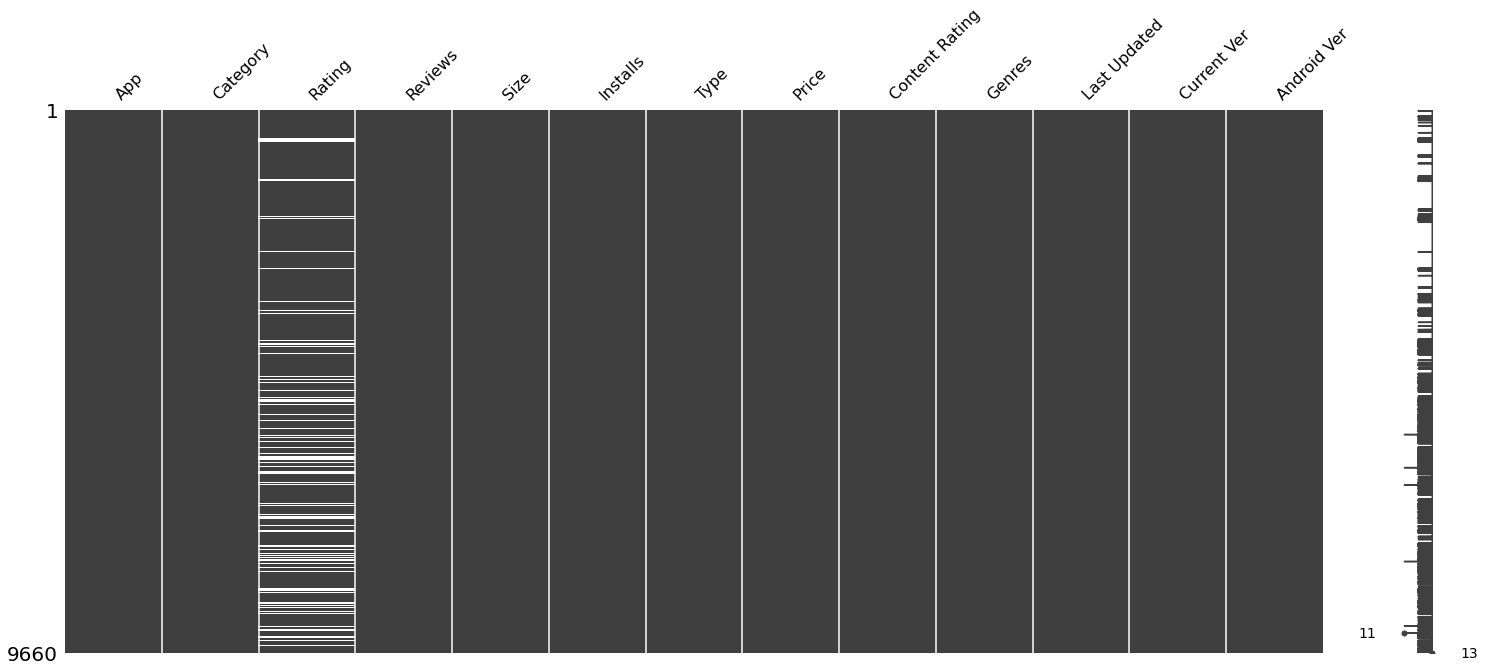

In [20]:
# Visualizing the missing values

import missingno as msno
msno.matrix(play_store_df)
plt.show()

In [21]:
# Lets see our dataframe with Null Values of Rating Column in play_store_df
play_store_df[~play_store_df['Rating'].isnull() == False]

App             Category  Rating  \
23                  Mcqueen Coloring pages       ART_AND_DESIGN     NaN   
113              Wrinkles and rejuvenation               BEAUTY     NaN   
123                 Manicure - nail design               BEAUTY     NaN   
126           Skin Care and Natural Beauty               BEAUTY     NaN   
129    Secrets of beauty, youth and health               BEAUTY     NaN   
...                                    ...                  ...     ...   
10824                            Cardio-FR              MEDICAL     NaN   
10825                   Naruto & Boruto FR               SOCIAL     NaN   
10831             payermonstationnement.fr  MAPS_AND_NAVIGATION     NaN   
10835                             FR Forms             BUSINESS     NaN   
10838               Parkinson Exercices FR              MEDICAL     NaN   

      Reviews  Size  Installs  Type Price Content Rating  \
23         61  7.0M  100,000+  Free     0       Everyone   
113       182  5.7M  100,000+  Free     0   Everyone 10+   
123       119  3.7M   50,000+  Free     0       Everyone   
126       654  7.4M  100,000+  Free     0           Teen   
129        77  2.9M   10,000+  Free     0     Mature 17+   
...       ...   ...       ...   ...   ...            ...   
10824      67   82M   10,000+  Free     0       Everyone   
10825       7  7.7M      100+  Free     0           Teen   
10831      38  9.8M    5,000+  Free     0       Everyone   
10835       0  9.6M       10+  Free     0       Everyone   
10838       3  9.5M    1,000+  Free     0       Everyone   

                                Genres        Last Updated Current Ver  \
23     Art & Design;Action & Adventure       March 7, 2018       1.0.0   
113                             Beauty  September 20, 2017         8.0   
123                             Beauty       July 23, 2018         1.3   
126                             Beauty       July 17, 2018        1.15   
129                             Beauty      August 8, 2017         2.0   
...                                ...                 ...         ...   
10824                          Medical       July 31, 2018       2.2.2   
10825                           Social    February 2, 2018         1.0   
10831                Maps & Navigation       June 13, 2018   2.0.148.0   
10835                         Business  September 29, 2016       1.1.5   
10838                          Medical    January 20, 2017         1.0   

      Android Ver  
23     4.1 and up  
113    3.0 and up  
123    4.1 and up  
126    4.1 and up  
129    2.3 and up  
...           ...  
10824  4.4 and up  
10825  4.0 and up  
10831  4.0 and up  
10835  4.0 and up  
10838  2.2 and up  

[1463 rows x 13 columns]

* As discussed earlier that there are 1463 Null values in the colum **Rating** of play_store_df. But it is also to be noticed that even though values in  Rating column is NaN/Null, these columns provide many other necessary insights about the apps like their category, size, number of installs, content rating etc. 
* Hence I have decided not to drop the columns but to replace the Null values with the mean rating of the dataset.

In [22]:
# Lets define a fucntion to replace null values
def replace_null(df_name , value_to_be_replaced):
  df_name.fillna (value = value_to_be_replaced , axis = 0, inplace = True )
  return print('Null Values succesfully filled with desired values')


* The above function has been defined to replace the null values with our chosen output.
* The function has been defined with two arguments. In first argument we pass the name of dataset and in second augument we can provide the formula or value with which we want to replace our null values.

In [23]:
# Fill the Null values of 'Rating' Coulmn with the mean rating.
replace_null(play_store_df['Rating'], play_store_df['Rating'].mean())

Null Values succesfully filled with desired values


In [24]:
play_store_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

* There are still some Null values remaining in our dataset, we will deal with them before going forward in the project.
  * As there is only one null value in column **Type**, we will replace it with 'Free'
  * We will replace the single null value of 'Content Rating' column to 'Everyone'.
  * And we will drop the columns 

In [25]:
# Checking the column containing Null Value
play_store_df[~play_store_df['Type'].isnull() ==False]

App Category    Rating Reviews  \
9148  Command & Conquer: Rivals   FAMILY  4.175052       0   

                    Size Installs Type Price Content Rating    Genres  \
9148  Varies with device        0  NaN     0   Everyone 10+  Strategy   

       Last Updated         Current Ver         Android Ver  
9148  June 28, 2018  Varies with device  Varies with device

In [26]:
# replacing the null value with string 'Free'
replace_null(play_store_df['Type'], 'Free')

Null Values succesfully filled with desired values


In [27]:
play_store_df.loc[9145:9150,:] 

App Category    Rating  Reviews  \
9145  EA SPORTS™ FIFA 18 Companion   SPORTS  3.900000   282727   
9146     The Simpsons™: Tapped Out   FAMILY  4.300000   636995   
9147         Plants vs. Zombies™ 2   FAMILY  4.400000   567632   
9148     Command & Conquer: Rivals   FAMILY  4.175052        0   
9149  Star Wars™: Galaxy of Heroes   FAMILY  4.500000  1461698   
9150                Dungeon Keeper   FAMILY  4.000000    69574   

                    Size     Installs  Type Price Content Rating  \
9145                 63M  10,000,000+  Free     0       Everyone   
9146                 49M  10,000,000+  Free     0           Teen   
9147                 15M  10,000,000+  Free     0   Everyone 10+   
9148  Varies with device            0  Free     0   Everyone 10+   
9149                 67M  10,000,000+  Free     0   Everyone 10+   
9150                 45M     500,000+  Free     0   Everyone 10+   

            Genres      Last Updated         Current Ver         Android Ver  
9145        Sports  December 7, 2017       18.0.5.172734          4.4 and up  
9146        Casual     July 31, 2018              4.34.0        4.0.3 and up  
9147        Casual     June 12, 2018               6.8.1          4.1 and up  
9148      Strategy     June 28, 2018  Varies with device  Varies with device  
9149  Role Playing      May 21, 2018         0.12.334385          4.1 and up  
9150      Strategy      May 24, 2018              1.8.91          4.1 and up

In [28]:
#Checking the null value of column 'Content Rating'
play_store_df[~play_store_df['Content Rating'].isnull() ==False]

App Category  Rating Reviews  \
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9    19.0    3.0M   

         Size Installs Type     Price Content Rating             Genres  \
10472  1,000+     Free    0  Everyone            NaN  February 11, 2018   

      Last Updated Current Ver Android Ver  
10472       1.0.19  4.0 and up         NaN

* We can see that due to missin value of Category Column, all the next values have shifted one place to their left hence messing up the whole coulmn. So we will drop this column.

In [29]:
play_store_df.dropna(subset = ['Content Rating'], inplace = True)
play_store_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

* Because the data present in the columns named "Current Ver" and "Android Ver" are not that much of importance for us, we will replace the null values with last valid observation of the dataset.

In [30]:
# Lets check the null values before trying to fill them in "Current Ver" column
play_store_df[~play_store_df['Current Ver'].isnull() ==False]

App             Category    Rating Reviews  \
15     Learn To Draw Kawaii Characters       ART_AND_DESIGN  3.200000      55   
1553              Market Update Helper   LIBRARIES_AND_DEMO  4.100000   20145   
6322            Virtual DJ Sound Mixer                TOOLS  4.200000    4010   
6803                         BT Master               FAMILY  4.175052       0   
7333                       Dots puzzle               FAMILY  4.000000     179   
7407                   Calculate My IQ               FAMILY  4.175052      44   
7730                            UFO-CQ                TOOLS  4.175052       1   
10342                   La Fe de Jesus  BOOKS_AND_REFERENCE  4.175052       8   

       Size    Installs  Type  Price Content Rating             Genres  \
15     2.7M      5,000+  Free      0       Everyone       Art & Design   
1553    11k  1,000,000+  Free      0       Everyone   Libraries & Demo   
6322   8.7M    500,000+  Free      0       Everyone              Tools   
6803   222k        100+  Free      0       Everyone          Education   
7333    14M     50,000+  Paid  $0.99       Everyone             Puzzle   
7407   7.2M     10,000+  Free      0       Everyone      Entertainment   
7730   237k         10+  Paid  $0.99       Everyone              Tools   
10342  658k      1,000+  Free      0       Everyone  Books & Reference   

            Last Updated Current Ver Android Ver  
15          June 6, 2018         NaN  4.2 and up  
1553   February 12, 2013         NaN  1.5 and up  
6322        May 10, 2017         NaN  4.0 and up  
6803    November 6, 2016         NaN  1.6 and up  
7333      April 18, 2018         NaN  4.0 and up  
7407       April 3, 2017         NaN  2.3 and up  
7730        July 4, 2016         NaN  2.0 and up  
10342   January 31, 2017         NaN  3.0 and up

In [31]:
# Using 'ffill' method to replace null values
play_store_df['Current Ver'].fillna(value=None , method='ffill', axis=None, inplace=True)

In [32]:
play_store_df.loc[13:15,:]

App        Category  Rating  \
13                            Mandala Coloring Book  ART_AND_DESIGN     4.6   
14  3D Color Pixel by Number - Sandbox Art Coloring  ART_AND_DESIGN     4.4   
15                  Learn To Draw Kawaii Characters  ART_AND_DESIGN     3.2   

   Reviews  Size  Installs  Type Price Content Rating        Genres  \
13    4326   21M  100,000+  Free     0       Everyone  Art & Design   
14    1518   37M  100,000+  Free     0       Everyone  Art & Design   
15      55  2.7M    5,000+  Free     0       Everyone  Art & Design   

      Last Updated Current Ver Android Ver  
13   June 26, 2018       1.0.4  4.4 and up  
14  August 3, 2018       1.2.3  2.3 and up  
15    June 6, 2018       1.2.3  4.2 and up

In [33]:
# We will use the same 'ffill' method to replace null values of "Android Ver" column as well
play_store_df['Android Ver'].fillna(value=None , method='ffill', axis=None, inplace=True)

In [34]:
play_store_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

* Now that we have take care of null values in first dataset, we wil now shift our focus towards 'User Review Dataset'

### 2. Dealing with the Null Values of User Review Dataset

In [35]:
user_review_df.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64



**In User Review Dataset:**
* All the columns, except the App name column, contains 26868 (approx) null value.




In [36]:
# Visualizing the Null Values of Rating Column in user_review_df
user_review_df[~user_review_df['Translated_Review'].isnull() == False]

App Translated_Review Sentiment  \
2            10 Best Foods for You               NaN       NaN   
7            10 Best Foods for You               NaN       NaN   
15           10 Best Foods for You               NaN       NaN   
102          10 Best Foods for You               NaN       NaN   
107          10 Best Foods for You               NaN       NaN   
...                            ...               ...       ...   
64290  Houzz Interior Design Ideas               NaN       NaN   
64291  Houzz Interior Design Ideas               NaN       NaN   
64292  Houzz Interior Design Ideas               NaN       NaN   
64293  Houzz Interior Design Ideas               NaN       NaN   
64294  Houzz Interior Design Ideas               NaN       NaN   

       Sentiment_Polarity  Sentiment_Subjectivity  
2                     NaN                     NaN  
7                     NaN                     NaN  
15                    NaN                     NaN  
102                   NaN                     NaN  
107                   NaN                     NaN  
...                   ...                     ...  
64290                 NaN                     NaN  
64291                 NaN                     NaN  
64292                 NaN                     NaN  
64293                 NaN                     NaN  
64294                 NaN                     NaN  

[26868 rows x 5 columns]

* The column containing the null values here are totally worthless as they do not provide any information about user review or sentiment in any way.
* Hence we will drop columns containing null values altogether.

In [37]:
user_review_df.dropna(subset = ['Translated_Review'], inplace = True)

In [38]:
user_review_df.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

* Atlast both our datasets are free from Null Values!!!! Am I smelling a little victory here!!!!

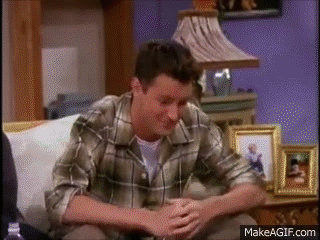

In [39]:
# Lets see our dataset once again after removing duplicate and null values

play_store_df

App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

         Rating Reviews                Size     Installs  Type Price  \
0      4.100000     159                 19M      10,000+  Free     0   
1      3.900000     967                 14M     500,000+  Free     0   
2      4.700000   87510                8.7M   5,000,000+  Free     0   
3      4.500000  215644                 25M  50,000,000+  Free     0   
4      4.300000     967                2.8M     100,000+  Free     0   
...         ...     ...                 ...          ...   ...   ...   
10836  4.500000      38                 53M       5,000+  Free     0   
10837  5.000000       4                3.6M         100+  Free     0   
10838  4.175052       3                9.5M       1,000+  Free     0   
10839  4.500000     114  Varies with device       1,000+  Free     0   
10840  4.500000  398307                 19M  10,000,000+  Free     0   

      Content Rating                     Genres      Last Updated  \
0           Everyone               Art & Design   January 7, 2018   
1           Everyone  Art & Design;Pretend Play  January 15, 2018   
2           Everyone               Art & Design    August 1, 2018   
3               Teen               Art & Design      June 8, 2018   
4           Everyone    Art & Design;Creativity     June 20, 2018   
...              ...                        ...               ...   
10836       Everyone                  Education     July 25, 2017   
10837       Everyone                  Education      July 6, 2018   
10838       Everyone                    Medical  January 20, 2017   
10839     Mature 17+          Books & Reference  January 19, 2015   
10840       Everyone                  Lifestyle     July 25, 2018   

              Current Ver         Android Ver  
0                   1.0.0        4.0.3 and up  
1                   2.0.0        4.0.3 and up  
2                   1.2.4        4.0.3 and up  
3      Varies with device          4.2 and up  
4                     1.1          4.4 and up  
...                   ...                 ...  
10836                1.48          4.1 and up  
10837                 1.0          4.1 and up  
10838                 1.0          2.2 and up  
10839  Varies with device  Varies with device  
10840  Varies with device  Varies with device  

[9659 rows x 13 columns]

* We need to reset index of our dataframes to get actual number of rows.

In [40]:
# Let's reset index to see the actual row numbers in dataframe
play_store_df.reset_index(inplace= True, drop= True)
play_store_df

App             Category  \
0        Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                   Coloring book moana       ART_AND_DESIGN   
2     U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                 Sketch - Draw & Paint       ART_AND_DESIGN   
4                 Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                 ...                  ...   
9654                                   Sya9a Maroc - FR               FAMILY   
9655                   Fr. Mike Schmitz Audio Teachings               FAMILY   
9656                             Parkinson Exercices FR              MEDICAL   
9657                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
9658      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

        Rating Reviews                Size     Installs  Type Price  \
0     4.100000     159                 19M      10,000+  Free     0   
1     3.900000     967                 14M     500,000+  Free     0   
2     4.700000   87510                8.7M   5,000,000+  Free     0   
3     4.500000  215644                 25M  50,000,000+  Free     0   
4     4.300000     967                2.8M     100,000+  Free     0   
...        ...     ...                 ...          ...   ...   ...   
9654  4.500000      38                 53M       5,000+  Free     0   
9655  5.000000       4                3.6M         100+  Free     0   
9656  4.175052       3                9.5M       1,000+  Free     0   
9657  4.500000     114  Varies with device       1,000+  Free     0   
9658  4.500000  398307                 19M  10,000,000+  Free     0   

     Content Rating                     Genres      Last Updated  \
0          Everyone               Art & Design   January 7, 2018   
1          Everyone  Art & Design;Pretend Play  January 15, 2018   
2          Everyone               Art & Design    August 1, 2018   
3              Teen               Art & Design      June 8, 2018   
4          Everyone    Art & Design;Creativity     June 20, 2018   
...             ...                        ...               ...   
9654       Everyone                  Education     July 25, 2017   
9655       Everyone                  Education      July 6, 2018   
9656       Everyone                    Medical  January 20, 2017   
9657     Mature 17+          Books & Reference  January 19, 2015   
9658       Everyone                  Lifestyle     July 25, 2018   

             Current Ver         Android Ver  
0                  1.0.0        4.0.3 and up  
1                  2.0.0        4.0.3 and up  
2                  1.2.4        4.0.3 and up  
3     Varies with device          4.2 and up  
4                    1.1          4.4 and up  
...                  ...                 ...  
9654                1.48          4.1 and up  
9655                 1.0          4.1 and up  
9656                 1.0          2.2 and up  
9657  Varies with device  Varies with device  
9658  Varies with device  Varies with device  

[9659 rows x 13 columns]

In [41]:
# Nows Lets see our Second dataframe
user_review_df

App  \
0               10 Best Foods for You   
1               10 Best Foods for You   
3               10 Best Foods for You   
4               10 Best Foods for You   
5               10 Best Foods for You   
...                               ...   
64222  Housing-Real Estate & Property   
64223  Housing-Real Estate & Property   
64226  Housing-Real Estate & Property   
64227  Housing-Real Estate & Property   
64230  Housing-Real Estate & Property   

                                       Translated_Review Sentiment  \
0      I like eat delicious food. That's I'm cooking ...  Positive   
1        This help eating healthy exercise regular basis  Positive   
3             Works great especially going grocery store  Positive   
4                                           Best idea us  Positive   
5                                               Best way  Positive   
...                                                  ...       ...   
64222  Most ads older many agents ..not much owner po...  Positive   
64223  If photos posted portal load, fit purpose. I'm...  Positive   
64226  Dumb app, I wanted post property rent give opt...  Negative   
64227  I property business got link SMS happy perform...  Positive   
64230  Useless app, I searched flats kondapur, Hydera...  Negative   

       Sentiment_Polarity  Sentiment_Subjectivity  
0                1.000000                0.533333  
1                0.250000                0.288462  
3                0.400000                0.875000  
4                1.000000                0.300000  
5                1.000000                0.300000  
...                   ...                     ...  
64222            0.173333                0.486667  
64223            0.225000                0.447222  
64226           -0.287500                0.250000  
64227            0.800000                1.000000  
64230           -0.316667                0.400000  

[37427 rows x 5 columns]

In [42]:
user_review_df.reset_index(inplace= True, drop= True)
user_review_df

App  \
0               10 Best Foods for You   
1               10 Best Foods for You   
2               10 Best Foods for You   
3               10 Best Foods for You   
4               10 Best Foods for You   
...                               ...   
37422  Housing-Real Estate & Property   
37423  Housing-Real Estate & Property   
37424  Housing-Real Estate & Property   
37425  Housing-Real Estate & Property   
37426  Housing-Real Estate & Property   

                                       Translated_Review Sentiment  \
0      I like eat delicious food. That's I'm cooking ...  Positive   
1        This help eating healthy exercise regular basis  Positive   
2             Works great especially going grocery store  Positive   
3                                           Best idea us  Positive   
4                                               Best way  Positive   
...                                                  ...       ...   
37422  Most ads older many agents ..not much owner po...  Positive   
37423  If photos posted portal load, fit purpose. I'm...  Positive   
37424  Dumb app, I wanted post property rent give opt...  Negative   
37425  I property business got link SMS happy perform...  Positive   
37426  Useless app, I searched flats kondapur, Hydera...  Negative   

       Sentiment_Polarity  Sentiment_Subjectivity  
0                1.000000                0.533333  
1                0.250000                0.288462  
2                0.400000                0.875000  
3                1.000000                0.300000  
4                1.000000                0.300000  
...                   ...                     ...  
37422            0.173333                0.486667  
37423            0.225000                0.447222  
37424           -0.287500                0.250000  
37425            0.800000                1.000000  
37426           -0.316667                0.400000  

[37427 rows x 5 columns]

### What did you know about your dataset?

### As there are two different datasets, we will discuss about them one by one:



###   ***Play Store Dataset i.e play_sore_df:***
  
  * This dataset contain the details about all the applications present in the Google Play Store, like Name, Size, Category, number of installs etc. 
  * There are total 13 Columns and 10841 Rows in the Dataset.
  * **Duplicated Values** :- In the column "App" 1181 Duplicated values were dropped and only those values were kept which occured first in dataframe.

  * **Null Values** :- 

      1. Rating Column had 1463 Null Values, replaced with mean rating.
      2. Type Column has 1 Null Value, replaced with str 'Free'.
      3. Content Rating Column had 1 Null Value, but after looking at data it was realised that data was messed up hence we dropped it.
      4. Columns "Current Ver" and "Android Ver" has combined 10 Null Values, we replaced them with last valid observations as this step will not hamper our EDA.
  * After cleaning the data, we had the indexes reset and ***now the remaining number or rows are 9659 in our play_store_df***.

###   ***User Review Dataset i.e user_Review_df:***

  * This dataset contain the details about all the reviews given by users after instaling and using applications from Google Playstore.

  * This dataset also contains sentiment (Positive, Neutral or Negetive) about the reviews

  * There were total 5 Columns and 64295 Rows in the Dataset.

  * **Duplicated Values** :- In the column "App" we found 33616 duplicated values, but because this dataframe may contain several reviews for a single app.
  * Duplicated values 

  * **Null Values** All the columns except the "App" column contained exactly (almost exactly) 26868 Null Values. On visualizing it was found that, except the app name, all other columns were containing Null values in these rows, hence we dropped all these rows.

  * After cleaning the dataset, we had rest the Index and ***now there are 37427 number of columns in the user_review_df***. 


   







## ***2. Understanding Your Variables***

In [43]:
# Play Store Dataset Columns
play_store_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

* We had already discussed earlier that there are 13 Columns in Play Store Dataset

In [44]:
# User Review Dataset Columns
user_review_df.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

* And there are 5 Columns in User Review Dataset

In [45]:
# Checking whether the data type of all the columns is correct
play_store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          9659 non-null   float64
 3   Reviews         9659 non-null   object 
 4   Size            9659 non-null   object 
 5   Installs        9659 non-null   object 
 6   Type            9659 non-null   object 
 7   Price           9659 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9659 non-null   object 
 12  Android Ver     9659 non-null   object 
dtypes: float64(1), object(12)
memory usage: 981.1+ KB


## In the Play Store Data there are some flaws in the data types of columns, like:
* Data in "Rating" & "Size" columns are showing to be object Dtype whereas actually they should be Float.

* Data in "Reviews" and "Installs" columns are also object Dtype whereas it should be Integer(Int) Type.

* Converting columns "Rating" and "Reviews" is easy but, not so easy in Columns "Size" and "Installs".

* In column "Size" we will convert all sizes to a single unit i.e. Mb and the we will remove the string part "M" from the values.

* In "Installs" column we will remove the "+" object from the number and only keep the numebers as the values. 

### Lets convert these columns to correct Data Types so that we can start with our data analysis and visualisation.

In [46]:
def clean_size_column (df):
    for i in df["Size"]:
      try:
        df["Size"] = df["Size"].apply(lambda x : x.replace('M', '') if 'M' in str(x) else x)
        df["Size"] = df["Size"].apply(lambda x : round(float(x.replace('k', ''))/1024,2) if 'k' in str(x) else x)
        df["Size"] = df["Size"].apply(lambda x : x.replace('Varies with device', '0') if 'Varies with device' in str(x) else x)
      except:
        pass 

      finally:
        df['Size'] = pd.to_numeric(df['Size'])  
        df.rename(columns={'Size': 'Size(in MB)'}, inplace= True)    
      return df


In [47]:
def clean_installs_column (df):
    for i in df["Installs"]:
      try:
        df["Installs"] = df["Installs"].apply(lambda x : x.replace('+', '') if '+' in str(x) else x)
        df["Installs"] = df["Installs"].apply(lambda x : x.replace(',', '') if ',' in str(x) else x)
     
      except:
        pass 

      finally:
        df['Installs'] = pd.to_numeric(df['Installs']) 
          
      return df

In [48]:
clean_size_column(play_store_df)

App             Category  \
0        Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                   Coloring book moana       ART_AND_DESIGN   
2     U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                 Sketch - Draw & Paint       ART_AND_DESIGN   
4                 Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                 ...                  ...   
9654                                   Sya9a Maroc - FR               FAMILY   
9655                   Fr. Mike Schmitz Audio Teachings               FAMILY   
9656                             Parkinson Exercices FR              MEDICAL   
9657                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
9658      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

        Rating Reviews  Size(in MB)     Installs  Type Price Content Rating  \
0     4.100000     159         19.0      10,000+  Free     0       Everyone   
1     3.900000     967         14.0     500,000+  Free     0       Everyone   
2     4.700000   87510          8.7   5,000,000+  Free     0       Everyone   
3     4.500000  215644         25.0  50,000,000+  Free     0           Teen   
4     4.300000     967          2.8     100,000+  Free     0       Everyone   
...        ...     ...          ...          ...   ...   ...            ...   
9654  4.500000      38         53.0       5,000+  Free     0       Everyone   
9655  5.000000       4          3.6         100+  Free     0       Everyone   
9656  4.175052       3          9.5       1,000+  Free     0       Everyone   
9657  4.500000     114          0.0       1,000+  Free     0     Mature 17+   
9658  4.500000  398307         19.0  10,000,000+  Free     0       Everyone   

                         Genres      Last Updated         Current Ver  \
0                  Art & Design   January 7, 2018               1.0.0   
1     Art & Design;Pretend Play  January 15, 2018               2.0.0   
2                  Art & Design    August 1, 2018               1.2.4   
3                  Art & Design      June 8, 2018  Varies with device   
4       Art & Design;Creativity     June 20, 2018                 1.1   
...                         ...               ...                 ...   
9654                  Education     July 25, 2017                1.48   
9655                  Education      July 6, 2018                 1.0   
9656                    Medical  January 20, 2017                 1.0   
9657          Books & Reference  January 19, 2015  Varies with device   
9658                  Lifestyle     July 25, 2018  Varies with device   

             Android Ver  
0           4.0.3 and up  
1           4.0.3 and up  
2           4.0.3 and up  
3             4.2 and up  
4             4.4 and up  
...                  ...  
9654          4.1 and up  
9655          4.1 and up  
9656          2.2 and up  
9657  Varies with device  
9658  Varies with device  

[9659 rows x 13 columns]

In [49]:
clean_installs_column(play_store_df)

App             Category  \
0        Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                   Coloring book moana       ART_AND_DESIGN   
2     U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                 Sketch - Draw & Paint       ART_AND_DESIGN   
4                 Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                 ...                  ...   
9654                                   Sya9a Maroc - FR               FAMILY   
9655                   Fr. Mike Schmitz Audio Teachings               FAMILY   
9656                             Parkinson Exercices FR              MEDICAL   
9657                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
9658      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

        Rating Reviews  Size(in MB)  Installs  Type Price Content Rating  \
0     4.100000     159         19.0     10000  Free     0       Everyone   
1     3.900000     967         14.0    500000  Free     0       Everyone   
2     4.700000   87510          8.7   5000000  Free     0       Everyone   
3     4.500000  215644         25.0  50000000  Free     0           Teen   
4     4.300000     967          2.8    100000  Free     0       Everyone   
...        ...     ...          ...       ...   ...   ...            ...   
9654  4.500000      38         53.0      5000  Free     0       Everyone   
9655  5.000000       4          3.6       100  Free     0       Everyone   
9656  4.175052       3          9.5      1000  Free     0       Everyone   
9657  4.500000     114          0.0      1000  Free     0     Mature 17+   
9658  4.500000  398307         19.0  10000000  Free     0       Everyone   

                         Genres      Last Updated         Current Ver  \
0                  Art & Design   January 7, 2018               1.0.0   
1     Art & Design;Pretend Play  January 15, 2018               2.0.0   
2                  Art & Design    August 1, 2018               1.2.4   
3                  Art & Design      June 8, 2018  Varies with device   
4       Art & Design;Creativity     June 20, 2018                 1.1   
...                         ...               ...                 ...   
9654                  Education     July 25, 2017                1.48   
9655                  Education      July 6, 2018                 1.0   
9656                    Medical  January 20, 2017                 1.0   
9657          Books & Reference  January 19, 2015  Varies with device   
9658                  Lifestyle     July 25, 2018  Varies with device   

             Android Ver  
0           4.0.3 and up  
1           4.0.3 and up  
2           4.0.3 and up  
3             4.2 and up  
4             4.4 and up  
...                  ...  
9654          4.1 and up  
9655          4.1 and up  
9656          2.2 and up  
9657  Varies with device  
9658  Varies with device  

[9659 rows x 13 columns]

In [50]:
play_store_df['Reviews'] = pd.to_numeric(play_store_df['Reviews'])

In [51]:
play_store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          9659 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Size(in MB)     9659 non-null   float64
 5   Installs        9659 non-null   int64  
 6   Type            9659 non-null   object 
 7   Price           9659 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9659 non-null   object 
 12  Android Ver     9659 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 981.1+ KB


In [52]:
play_store_df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [53]:
def clean_price_column (df):
  for i in df['Price']:
    try:
      df['Price'] = df['Price'].apply (lambda x: x.replace('$','') if '$' in x else x)
    
    except:
      pass
    
    finally:
      df['Price'] = round(pd.to_numeric((df['Price'])),2)  
      df.rename(columns={'Price': 'Price(in $USD)'}, inplace= True)
    
    return df

In [54]:
clean_price_column(play_store_df)

App             Category  \
0        Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                   Coloring book moana       ART_AND_DESIGN   
2     U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                 Sketch - Draw & Paint       ART_AND_DESIGN   
4                 Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                 ...                  ...   
9654                                   Sya9a Maroc - FR               FAMILY   
9655                   Fr. Mike Schmitz Audio Teachings               FAMILY   
9656                             Parkinson Exercices FR              MEDICAL   
9657                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
9658      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

        Rating  Reviews  Size(in MB)  Installs  Type  Price(in $USD)  \
0     4.100000      159         19.0     10000  Free             0.0   
1     3.900000      967         14.0    500000  Free             0.0   
2     4.700000    87510          8.7   5000000  Free             0.0   
3     4.500000   215644         25.0  50000000  Free             0.0   
4     4.300000      967          2.8    100000  Free             0.0   
...        ...      ...          ...       ...   ...             ...   
9654  4.500000       38         53.0      5000  Free             0.0   
9655  5.000000        4          3.6       100  Free             0.0   
9656  4.175052        3          9.5      1000  Free             0.0   
9657  4.500000      114          0.0      1000  Free             0.0   
9658  4.500000   398307         19.0  10000000  Free             0.0   

     Content Rating                     Genres      Last Updated  \
0          Everyone               Art & Design   January 7, 2018   
1          Everyone  Art & Design;Pretend Play  January 15, 2018   
2          Everyone               Art & Design    August 1, 2018   
3              Teen               Art & Design      June 8, 2018   
4          Everyone    Art & Design;Creativity     June 20, 2018   
...             ...                        ...               ...   
9654       Everyone                  Education     July 25, 2017   
9655       Everyone                  Education      July 6, 2018   
9656       Everyone                    Medical  January 20, 2017   
9657     Mature 17+          Books & Reference  January 19, 2015   
9658       Everyone                  Lifestyle     July 25, 2018   

             Current Ver         Android Ver  
0                  1.0.0        4.0.3 and up  
1                  2.0.0        4.0.3 and up  
2                  1.2.4        4.0.3 and up  
3     Varies with device          4.2 and up  
4                    1.1          4.4 and up  
...                  ...                 ...  
9654                1.48          4.1 and up  
9655                 1.0          4.1 and up  
9656                 1.0          2.2 and up  
9657  Varies with device  Varies with device  
9658  Varies with device  Varies with device  

[9659 rows x 13 columns]

In [55]:
play_store_df['Price(in $USD)'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

### As a final step in data cleaning process we will drop those columns which do not contribute towards our objective.
* After looking at the coulmns it seems that there are 3 columns which we can drop without sacrificing any important data in order to achieve our objective, these are:
  * Last Updated
  * Current Ver
  * Android Ver

* So, next we will drop these columns from our dataset and finally our dataset will be ready for the data wrangling and data visualization.

In [56]:
# Dropping unwanted columns
play_store_df.drop(columns =['Last Updated','Current Ver', 'Android Ver'], inplace= True)


In [57]:
play_store_df

App             Category  \
0        Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                   Coloring book moana       ART_AND_DESIGN   
2     U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                 Sketch - Draw & Paint       ART_AND_DESIGN   
4                 Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                 ...                  ...   
9654                                   Sya9a Maroc - FR               FAMILY   
9655                   Fr. Mike Schmitz Audio Teachings               FAMILY   
9656                             Parkinson Exercices FR              MEDICAL   
9657                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
9658      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

        Rating  Reviews  Size(in MB)  Installs  Type  Price(in $USD)  \
0     4.100000      159         19.0     10000  Free             0.0   
1     3.900000      967         14.0    500000  Free             0.0   
2     4.700000    87510          8.7   5000000  Free             0.0   
3     4.500000   215644         25.0  50000000  Free             0.0   
4     4.300000      967          2.8    100000  Free             0.0   
...        ...      ...          ...       ...   ...             ...   
9654  4.500000       38         53.0      5000  Free             0.0   
9655  5.000000        4          3.6       100  Free             0.0   
9656  4.175052        3          9.5      1000  Free             0.0   
9657  4.500000      114          0.0      1000  Free             0.0   
9658  4.500000   398307         19.0  10000000  Free             0.0   

     Content Rating                     Genres  
0          Everyone               Art & Design  
1          Everyone  Art & Design;Pretend Play  
2          Everyone               Art & Design  
3              Teen               Art & Design  
4          Everyone    Art & Design;Creativity  
...             ...                        ...  
9654       Everyone                  Education  
9655       Everyone                  Education  
9656       Everyone                    Medical  
9657     Mature 17+          Books & Reference  
9658       Everyone                  Lifestyle  

[9659 rows x 10 columns]

In [58]:
user_review_df

App  \
0               10 Best Foods for You   
1               10 Best Foods for You   
2               10 Best Foods for You   
3               10 Best Foods for You   
4               10 Best Foods for You   
...                               ...   
37422  Housing-Real Estate & Property   
37423  Housing-Real Estate & Property   
37424  Housing-Real Estate & Property   
37425  Housing-Real Estate & Property   
37426  Housing-Real Estate & Property   

                                       Translated_Review Sentiment  \
0      I like eat delicious food. That's I'm cooking ...  Positive   
1        This help eating healthy exercise regular basis  Positive   
2             Works great especially going grocery store  Positive   
3                                           Best idea us  Positive   
4                                               Best way  Positive   
...                                                  ...       ...   
37422  Most ads older many agents ..not much owner po...  Positive   
37423  If photos posted portal load, fit purpose. I'm...  Positive   
37424  Dumb app, I wanted post property rent give opt...  Negative   
37425  I property business got link SMS happy perform...  Positive   
37426  Useless app, I searched flats kondapur, Hydera...  Negative   

       Sentiment_Polarity  Sentiment_Subjectivity  
0                1.000000                0.533333  
1                0.250000                0.288462  
2                0.400000                0.875000  
3                1.000000                0.300000  
4                1.000000                0.300000  
...                   ...                     ...  
37422            0.173333                0.486667  
37423            0.225000                0.447222  
37424           -0.287500                0.250000  
37425            0.800000                1.000000  
37426           -0.316667                0.400000  

[37427 rows x 5 columns]

In [59]:
# Describe the play store dataset
play_store_df.describe()

Rating       Reviews  Size(in MB)      Installs  Price(in $USD)
count  9659.000000  9.659000e+03  9659.000000  9.659000e+03     9659.000000
mean      4.173517  2.165926e+05    17.804105  7.777507e+06        1.099299
std       0.494313  1.831320e+06    21.495511  5.375828e+07       16.852152
min       1.000000  0.000000e+00     0.000000  0.000000e+00        0.000000
25%       4.000000  2.500000e+01     2.900000  1.000000e+03        0.000000
50%       4.200000  9.670000e+02     9.100000  1.000000e+05        0.000000
75%       4.500000  2.940100e+04    25.000000  1.000000e+06        0.000000
max       5.000000  7.815831e+07   100.000000  1.000000e+09      400.000000

In [60]:
# Describe the user review dataset
user_review_df.describe()

Sentiment_Polarity  Sentiment_Subjectivity
count        37427.000000            37427.000000
mean             0.182171                0.492770
std              0.351318                0.259904
min             -1.000000                0.000000
25%              0.000000                0.357143
50%              0.150000                0.514286
75%              0.400000                0.650000
max              1.000000                1.000000

* ### We have successfully processed the values and corrected the data type according to our need.

### Variables Description 

Answer Here

### Check Unique Values for each variable.

In [61]:
# Check Unique Values for each variable.
def get_unique_values (df_name):
  for i in df_name.columns:
    print(f"There are {df_name[i].nunique()} unique values in column '{i}'")
    

* As it will be a tedious task to check for unique values one by one for each column, hence we are defining a function which will give the number of unique values of each column in a single shot.

In [62]:
get_unique_values(play_store_df)

There are 9659 unique values in column 'App'
There are 33 unique values in column 'Category'
There are 40 unique values in column 'Rating'
There are 5330 unique values in column 'Reviews'
There are 274 unique values in column 'Size(in MB)'
There are 20 unique values in column 'Installs'
There are 2 unique values in column 'Type'
There are 92 unique values in column 'Price(in $USD)'
There are 6 unique values in column 'Content Rating'
There are 118 unique values in column 'Genres'


In [63]:
get_unique_values(user_review_df)

There are 865 unique values in column 'App'
There are 27994 unique values in column 'Translated_Review'
There are 3 unique values in column 'Sentiment'
There are 5410 unique values in column 'Sentiment_Polarity'
There are 4474 unique values in column 'Sentiment_Subjectivity'


## 3. ***Data Wrangling***

### Data Wrangling Code

In [64]:
# Write your code to make your dataset analysis ready.


* ### Now that we have both of our datasets ready for data wrangling and visualization, we will go a step further and create a third dataframe.

* ### We will name the third dataframe as "combined_df". In this combined_df we will merge the existing two datasets on the basis of "App" names to get a single dataset where both "App" and "User Review" data is present. 

In [65]:
# Creating Combined Dataset
combined_df = pd.merge(play_store_df, user_review_df, how='inner', left_on ='App', right_on ='App')

In [66]:
#Getting info of combined data columns
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35929 entries, 0 to 35928
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     35929 non-null  object 
 1   Category                35929 non-null  object 
 2   Rating                  35929 non-null  float64
 3   Reviews                 35929 non-null  int64  
 4   Size(in MB)             35929 non-null  float64
 5   Installs                35929 non-null  int64  
 6   Type                    35929 non-null  object 
 7   Price(in $USD)          35929 non-null  float64
 8   Content Rating          35929 non-null  object 
 9   Genres                  35929 non-null  object 
 10  Translated_Review       35929 non-null  object 
 11  Sentiment               35929 non-null  object 
 12  Sentiment_Polarity      35929 non-null  float64
 13  Sentiment_Subjectivity  35929 non-null  float64
dtypes: float64(5), int64(2), object(7)
mem

* There are no null values in our combined dataset

In [67]:
# Lets use the function 'get_duplicate_value_count' to find whether our combined_df contains any duplicate rows or not?
get_duplicate_value_count(combined_df)

Number of Duplicated values are App                       7679
Category                  7679
Rating                    7679
Reviews                   7679
Size(in MB)               7679
Installs                  7679
Type                      7679
Price(in $USD)            7679
Content Rating            7679
Genres                    7679
Translated_Review         7679
Sentiment                 7679
Sentiment_Polarity        7679
Sentiment_Subjectivity    7679
dtype: int64 


* Hmmmmmmm.... This is interesting, still 7679 duplicates????
* Lets use python defined function to double check the duplicated values

In [68]:
# Double checking the duplicate values
combined_df[combined_df.duplicated()== True]


App             Category  Rating  Reviews  \
19              Coloring book moana       ART_AND_DESIGN     3.9      967   
20              Coloring book moana       ART_AND_DESIGN     3.9      967   
22              Coloring book moana       ART_AND_DESIGN     3.9      967   
23              Coloring book moana       ART_AND_DESIGN     3.9      967   
24              Coloring book moana       ART_AND_DESIGN     3.9      967   
...                             ...                  ...     ...      ...   
34699  Comptia A+ 220-901 & 220-902               FAMILY     4.4      174   
34700  Comptia A+ 220-901 & 220-902               FAMILY     4.4      174   
34791                          Azar        COMMUNICATION     4.2  1092337   
34792                          Azar        COMMUNICATION     4.2  1092337   
35298                         Bible  BOOKS_AND_REFERENCE     4.7  2440695   

       Size(in MB)   Installs  Type  Price(in $USD) Content Rating  \
19            14.0     500000  Free             0.0       Everyone   
20            14.0     500000  Free             0.0       Everyone   
22            14.0     500000  Free             0.0       Everyone   
23            14.0     500000  Free             0.0       Everyone   
24            14.0     500000  Free             0.0       Everyone   
...            ...        ...   ...             ...            ...   
34699          5.7      10000  Free             0.0       Everyone   
34700          5.7      10000  Free             0.0       Everyone   
34791          0.0   50000000  Free             0.0     Mature 17+   
34792          0.0   50000000  Free             0.0     Mature 17+   
35298          0.0  100000000  Free             0.0           Teen   

                          Genres  \
19     Art & Design;Pretend Play   
20     Art & Design;Pretend Play   
22     Art & Design;Pretend Play   
23     Art & Design;Pretend Play   
24     Art & Design;Pretend Play   
...                          ...   
34699                  Education   
34700                  Education   
34791              Communication   
34792              Communication   
35298          Books & Reference   

                                       Translated_Review Sentiment  \
19                                                I love  Positive   
20                                                  Love  Positive   
22     A kid's excessive ads. The types ads allowed a...  Negative   
23                                              It cute.  Positive   
24                                            It bad >:(  Negative   
...                                                  ...       ...   
34699                                               Love  Positive   
34700                                               Love  Positive   
34791                                               Nice  Positive   
34792                                               Nice  Positive   
35298                                               Love  Positive   

       Sentiment_Polarity  Sentiment_Subjectivity  
19                  0.500                0.600000  
20                  0.500                0.600000  
22                 -0.250                1.000000  
23                  0.500                1.000000  
24                 -0.725                0.833333  
...                   ...                     ...  
34699               0.500                0.600000  
34700               0.500                0.600000  
34791               0.600                1.000000  
34792               0.600                1.000000  
35298               0.500                0.600000  

[7679 rows x 14 columns]

In [69]:
# Lets visualize some duplicated rows just to be sure
combined_df[combined_df['Translated_Review']=='It bad >:(']

App        Category  Rating  Reviews  Size(in MB)  \
1   Coloring book moana  ART_AND_DESIGN     3.9      967         14.0   
24  Coloring book moana  ART_AND_DESIGN     3.9      967         14.0   

    Installs  Type  Price(in $USD) Content Rating                     Genres  \
1     500000  Free             0.0       Everyone  Art & Design;Pretend Play   
24    500000  Free             0.0       Everyone  Art & Design;Pretend Play   

   Translated_Review Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
1         It bad >:(  Negative              -0.725                0.833333  
24        It bad >:(  Negative              -0.725                0.833333

* In our combined_df there are some diuplicate rows which contains exactly the same data. After being satisfied that these rows are indeed duplicates, we will remove the duplicated rows.

In [70]:
# Lets get rid of duplicated values from the new combined_df
combined_df.drop_duplicates(keep='first', inplace=True)


In [71]:
# We have removed all duplicates from the combined_df
combined_df.duplicated().sum()

0

In [72]:
# Getting the unique values of combined_df
get_unique_values(combined_df)

There are 816 unique values in column 'App'
There are 33 unique values in column 'Category'
There are 22 unique values in column 'Rating'
There are 807 unique values in column 'Reviews'
There are 167 unique values in column 'Size(in MB)'
There are 12 unique values in column 'Installs'
There are 2 unique values in column 'Type'
There are 9 unique values in column 'Price(in $USD)'
There are 5 unique values in column 'Content Rating'
There are 67 unique values in column 'Genres'
There are 26682 unique values in column 'Translated_Review'
There are 3 unique values in column 'Sentiment'
There are 5295 unique values in column 'Sentiment_Polarity'
There are 4382 unique values in column 'Sentiment_Subjectivity'


* We can see that in the new combined_df there is data belonging to only 816 unique Apps. 

* It means that only 816 applications's matching data is present in **user_review_df** out of 9659 apps in **play_store_df** .

In [73]:
# Total installs of apps listed in Google Play Store worldwide?

play_store_df['Installs'].sum()

75122937527

* The applications listed in Google Play Store have been installed a whopping 75.122 Billion times altogether, which is almost 10 times the the world population itself. 

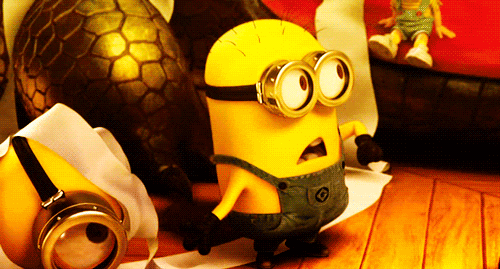

### What all manipulations have you done and insights you found?



```
# This is formatted as code
```



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 (Free Vs Paid Apps in Playstore)

In [74]:
# Chart - 1 visualization code

# Storing free and paid apps data in a new variable
free_vs_paid = play_store_df['Type'].value_counts().reset_index()
free_vs_paid.rename(columns ={'index': 'Type', 'Type': 'number'}, inplace= True)
free_vs_paid

Type  number
0  Free    8903
1  Paid     756

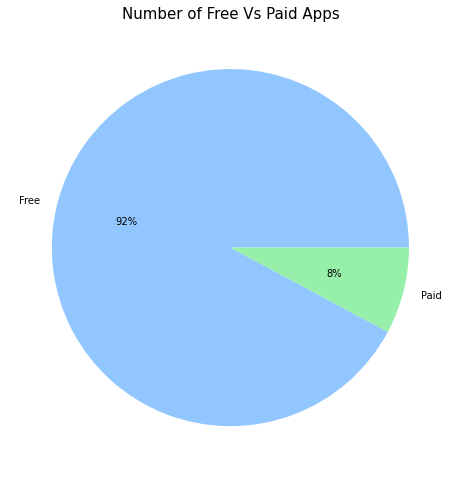

In [100]:
# Plotting the pie chart
plt.figure(figsize = (8,10))
plt.pie(x='number', data = free_vs_paid, labels = 'Type', autopct='%.0f%%')
plt.title('Number of Free Vs Paid Apps', fontsize= 15)
plt.show()

##### 1. Why did you pick the specific chart?
---
* I picked this chart to see the comparison between the number of Free and Paid apps present in Play Store.

##### 2. What is/are the insight(s) found from the chart?

---
* After viewing this pie chart we were able to see that only 8% out of total apps in Google Play Store are paid apps, and rest 92% are free to use. 


##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.
---
* This information will help business to decide whether they should keep the app free to install and generate revenue from ads and other subscriptions OR should it be a paid app.


#### Chart - 2 (Top Categories in terms of Number of Apps)

In [76]:
# Chart - 2 visualization code
categories = play_store_df['Category'].value_counts()


In [77]:
plt.rcParams['figure.figsize'] = (20, 8)

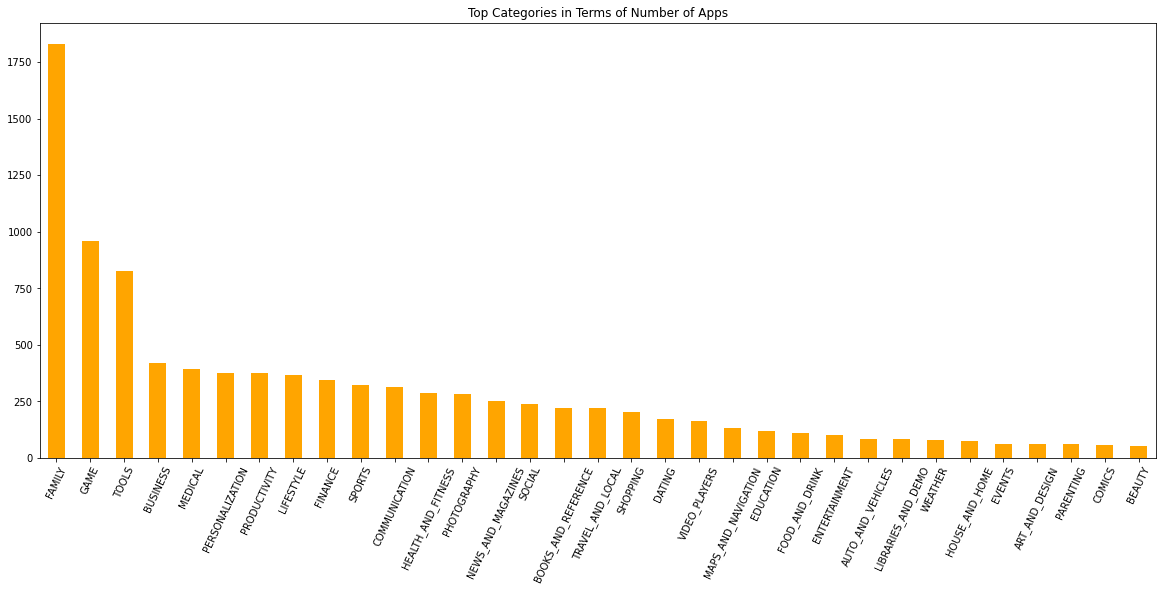

In [78]:
# Plotting top ten categories in terms of number of apps present in Playstore
categories.plot(kind ='bar', color ='orange')

plt.title('Top Categories in Terms of Number of Apps')
plt.xlabel= ('Categories')
plt.xticks(rotation = 65)
plt.ylabel = ('Count')

##### 1. Why did you pick the specific chart?
---
* I picked this chart to see the top categories in terms of number of apps in Google Play Store.

##### 2. What is/are the insight(s) found from the chart?

---
* In the above figure we can see that the most number of apps present in Play Store App belongs to category "Family"


##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.
---
* This information will help business to decide whether they should keep the app free to install and generate revenue from ads and other subscriptions OR should it be a paid app.


#### Chart - 3 (Most Populat Categories in terms of Number of Installs and User reviews)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text major ticklabel objects>)

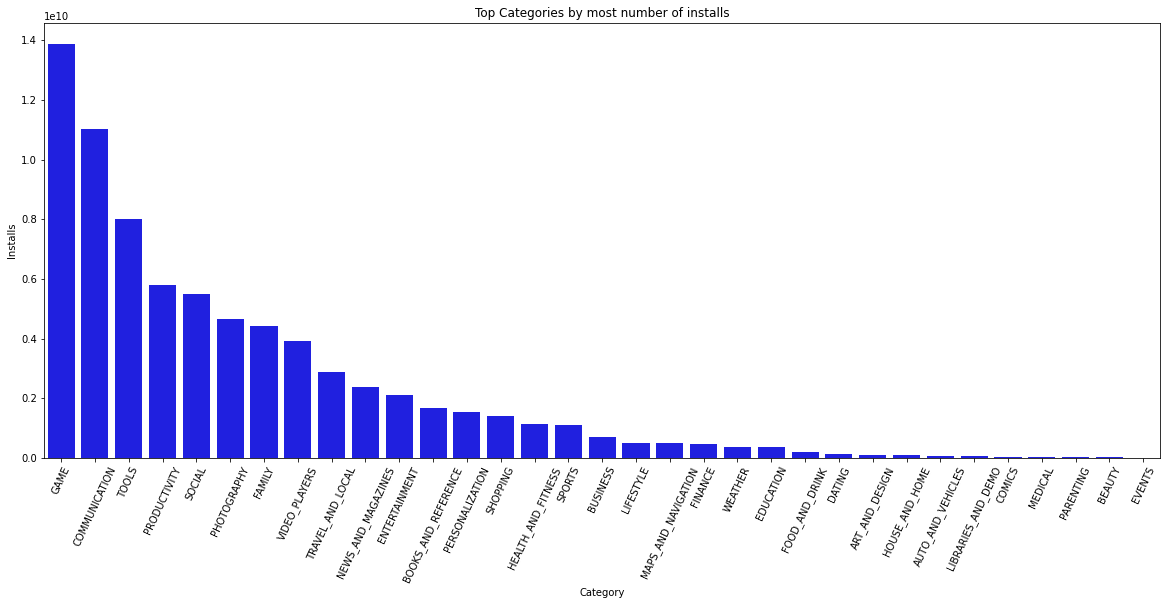

In [79]:
# Plotting categories by most number of installs in each category

# defining variable for categories by most number of installs
top_categories_by_installs = play_store_df.groupby('Category')['Installs'].sum().reset_index()
top_categories_by_installs = top_categories_by_installs.sort_values(by = ['Installs'], ascending = False).reset_index()


# Plotting the bar plot
sns.barplot( data = top_categories_by_installs, x = 'Category', y = 'Installs', color = 'blue')
plt.title('Top Categories by most number of installs')
plt.xticks(rotation = 65)


##### 1. Why did you pick the specific chart?

* In the chart number 2 

##### 2. What is/are the insight(s) found from the chart?

* The most number of apps present in the Google Play Store belong to the category "Family". 

* However, the most popular category among the users is "Game".

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

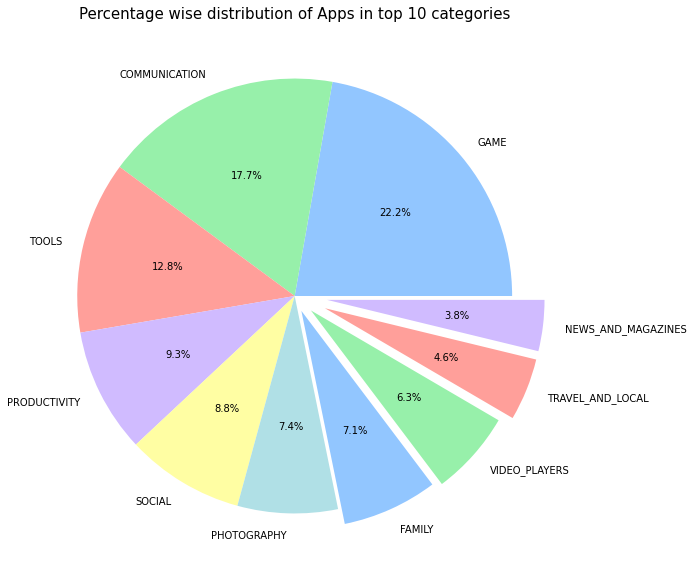

In [80]:
# Chart - 4 Distribution of top categories in pie chart
top_categories_by_installs = top_categories_by_installs.head(10).sort_values(by = ['Installs'], ascending = False)

plt.figure(figsize = (10,10))
plt.pie( x = 'Installs',labels='Category', data = top_categories_by_installs, autopct='%0.1f%%', explode = [0,0,0,0,0,0,0.075,0.1,0.15,0.15])
plt.title('Percentage wise distribution of Apps in top 10 categories', fontsize= 15)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

* The most number of apps present in the Google Play Store belong to the category "Family". 

* However, the most popular category among the users is "Game".

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [81]:
# Chart - 5 visualization code (Most populat target audience)
top_content_ratings = play_store_df['Content Rating'].value_counts()
top_content_ratings

Everyone           7903
Teen               1036
Mature 17+          393
Everyone 10+        322
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

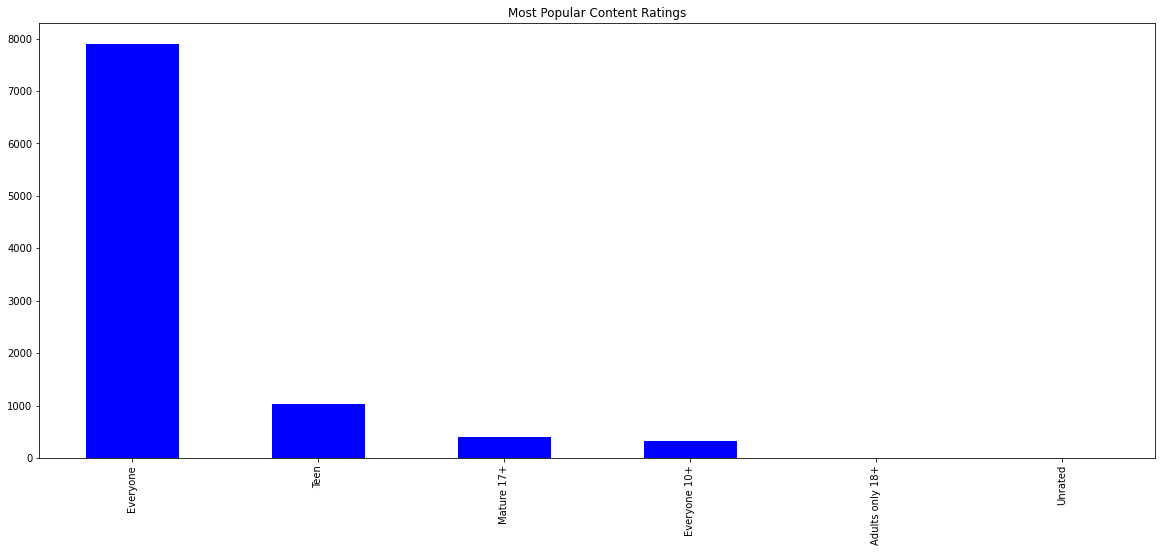

In [82]:
top_content_ratings.plot(kind = 'bar', color = 'blue')
plt.title('Most Popular Content Ratings')
plt.xlabel = ('Content Ratings')
plt.ylabel = ('Count')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [83]:
# Chart - 6 visualization code (Top 5 Genre)
top_5_genre = play_store_df['Genres'].value_counts().head(5).reset_index()
top_5_genre.rename(columns ={'index':'Genres', 'Genres':'Number'}, inplace= True)

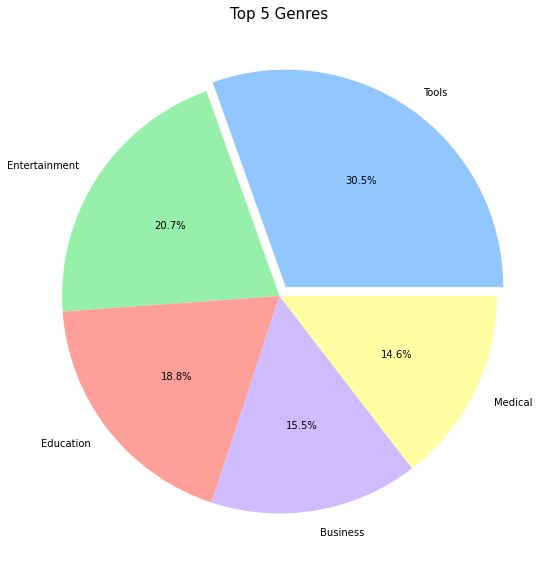

In [84]:
plt.figure(figsize = (10,10))
plt.pie( x = 'Number',labels='Genres', data = top_5_genre, autopct='%0.1f%%', explode=[0.05,0,0,0,0])
plt.title('Top 5 Genres', fontsize= 15)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

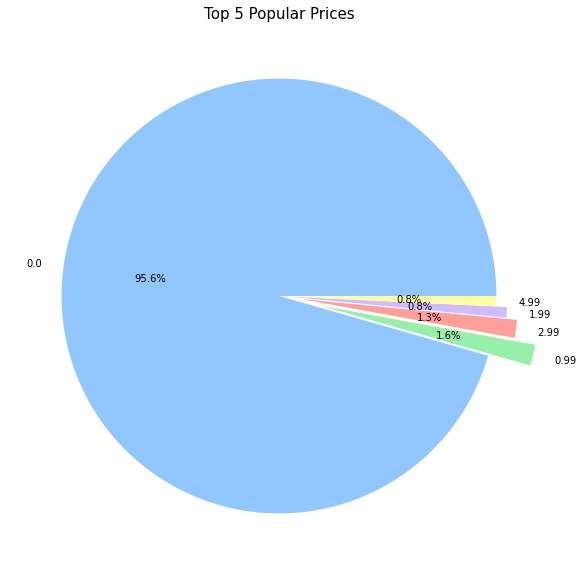

In [85]:
# Chart - 7 visualization code ()
Top_5_prices = play_store_df['Price(in $USD)'].value_counts().head(5).reset_index()
Top_5_prices.rename(columns ={'index':'Price(in $USD)', 'Price(in $USD)':'Number of Apps'}, inplace= True)

plt.figure(figsize = (10,10))
plt.pie(x=Top_5_prices['Number of Apps'], labels = 'Price(in $USD)', data = Top_5_prices, autopct='%0.1f%%' , explode = [0,0.2,0.1,0.05,0])
plt.title('Top 5 Popular Prices', fontsize= 15)
plt.show()

In [86]:
Top_5_prices

Price(in $USD)  Number of Apps
0            0.00            8903
1            0.99             145
2            2.99             124
3            1.99              73
4            4.99              70

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8


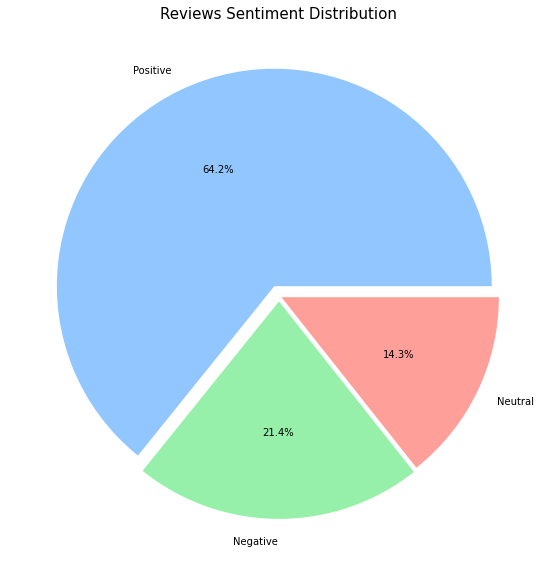

In [87]:
# Chart - 8 visualization code (Review Sentiment distribution)
sentiment_categories = combined_df['Sentiment'].value_counts().reset_index()
sentiment_categories.rename(columns ={'index':'Sentiment', 'Sentiment':'Number of Reviews'}, inplace= True)

plt.figure(figsize = (10,10))
plt.pie(x = 'Number of Reviews', labels='Sentiment', data = sentiment_categories, autopct='%0.1f%%', explode=[0.05,0.025,0.0125])
plt.title('Reviews Sentiment Distribution', fontsize= 15)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

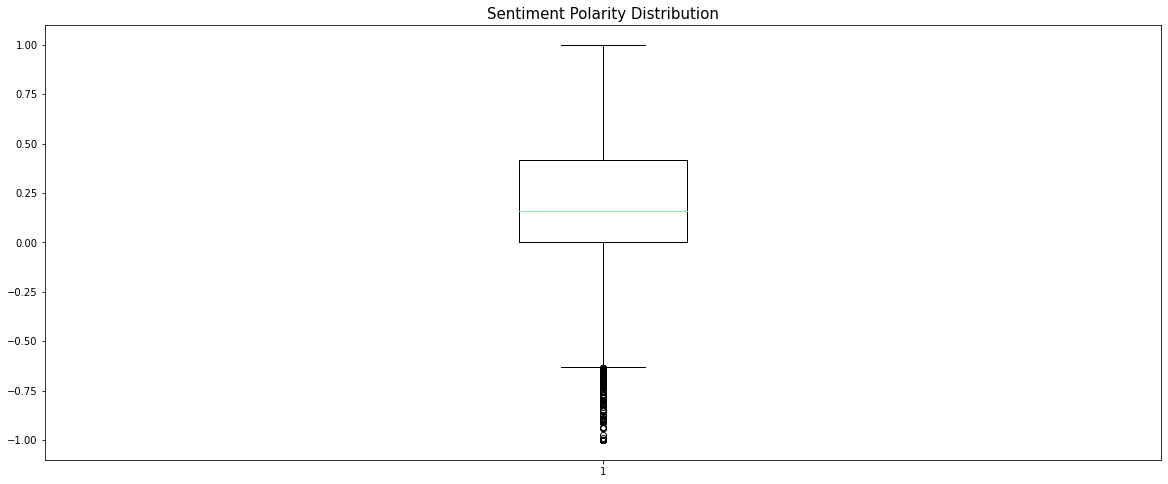

In [88]:
# Chart - 9 visualization code (Sentiment Polarity)

# describing sentiment_polarity variable
sentiment_polarity = combined_df['Sentiment_Polarity']

# Plotting Boxplot
plt.boxplot(sentiment_polarity)

# Setting X & Y labels
plt.title('Sentiment Polarity Distribution', fontsize= 15)
plt.xlabel=('Sentiment Polarity') 
plt.ylabel=('Distribution of Sentiment Polarity')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

### Now we will start Bivariate Analysis i.e we will find relation and information by comparing columns like (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical).

#### Chart - 10

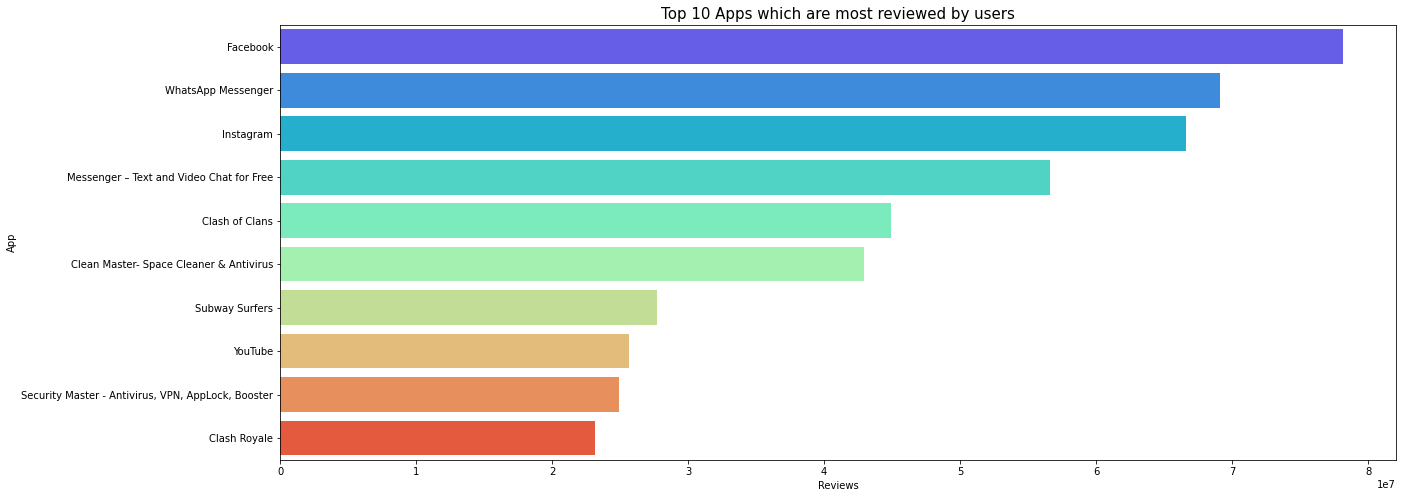

In [89]:
# Chart - 10 (Top 10 Most Reviewed Apps)
top_10_reviewed_apps = play_store_df.sort_values(by = ['Reviews'], ascending = False).head(10).reset_index(drop = True)
#top_10_reviewed_apps

# Plotting the apps which are installed and reviewed most number of times by users
sns.barplot(y ='App', x = 'Reviews', data = top_10_reviewed_apps, palette= "rainbow", orient ='h')

# Setting the title, xlabel and ylabel of plot
plt.title('Top 10 Apps which are most reviewed by users', fontsize= 15)
plt.xlabel = "Name of Apps"
plt.ylabel = 'Number of Installs'


In [90]:
top_10_reviewed_apps

App       Category  Rating  \
0                                           Facebook         SOCIAL     4.1   
1                                 WhatsApp Messenger  COMMUNICATION     4.4   
2                                          Instagram         SOCIAL     4.5   
3           Messenger – Text and Video Chat for Free  COMMUNICATION     4.0   
4                                     Clash of Clans           GAME     4.6   
5            Clean Master- Space Cleaner & Antivirus          TOOLS     4.7   
6                                     Subway Surfers           GAME     4.5   
7                                            YouTube  VIDEO_PLAYERS     4.3   
8  Security Master - Antivirus, VPN, AppLock, Boo...          TOOLS     4.7   
9                                       Clash Royale           GAME     4.6   

    Reviews  Size(in MB)    Installs  Type  Price(in $USD) Content Rating  \
0  78158306          0.0  1000000000  Free             0.0           Teen   
1  69119316          0.0  1000000000  Free             0.0       Everyone   
2  66577313          0.0  1000000000  Free             0.0           Teen   
3  56642847          0.0  1000000000  Free             0.0       Everyone   
4  44891723         98.0   100000000  Free             0.0   Everyone 10+   
5  42916526          0.0   500000000  Free             0.0       Everyone   
6  27722264         76.0  1000000000  Free             0.0   Everyone 10+   
7  25655305          0.0  1000000000  Free             0.0           Teen   
8  24900999          0.0   500000000  Free             0.0       Everyone   
9  23133508         97.0   100000000  Free             0.0   Everyone 10+   

                    Genres  
0                   Social  
1            Communication  
2                   Social  
3            Communication  
4                 Strategy  
5                    Tools  
6                   Arcade  
7  Video Players & Editors  
8                    Tools  
9                 Strategy

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

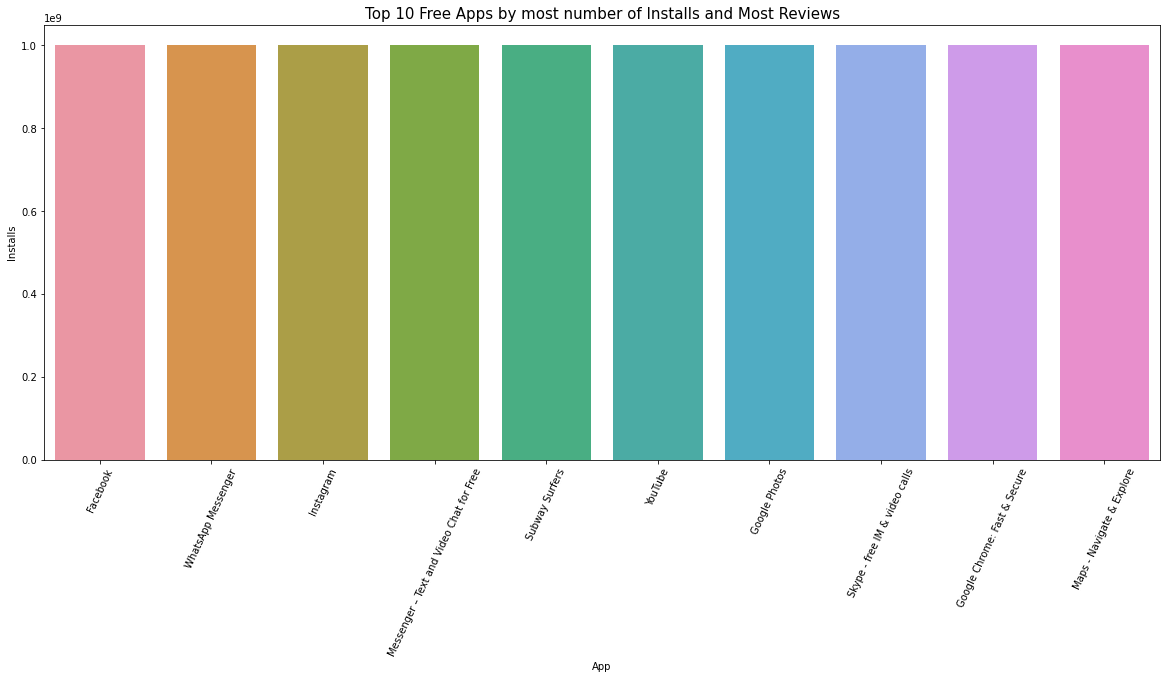

In [91]:
# Chart - 11 visualization code (Top 10 Free App by number of Installs and number of Reviews)
top_10_free_apps = play_store_df[play_store_df['Type'] == 'Free']
top_10_free_apps = top_10_free_apps.sort_values(by = ['Installs','Reviews'], ascending = [False, False]).head(10)
#top_10_free_apps

# Plotting the apps which are installed and reviewed most number of times by users
sns.barplot(x ='App', y = 'Installs', data = top_10_free_apps)

plt.title('Top 10 Free Apps by most number of Installs and Most Reviews', fontsize= 15)
plt.xticks(rotation = 65)
plt.xlabel = 'Name of Apps'
plt.ylabel = 'Number of Installs'



##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

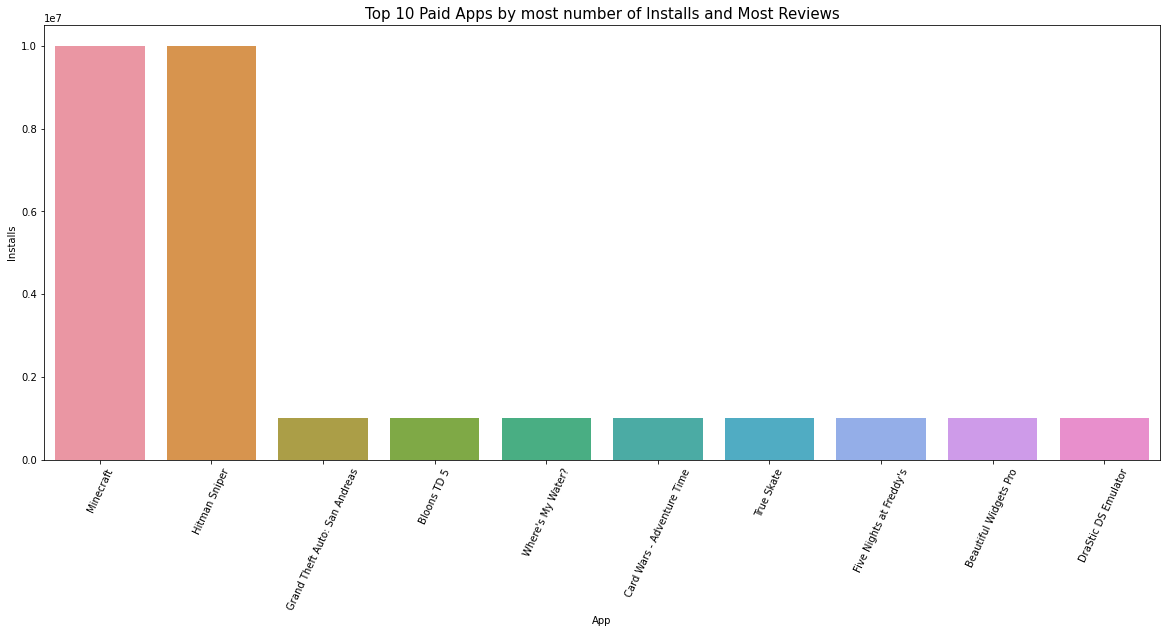

In [92]:
# Chart - 12 visualization code (Top 10 Free App by number of Installs and number of Reviews)
top_10_paid_apps = play_store_df[play_store_df['Type'] == 'Paid']
top_10_paid_apps = top_10_paid_apps.sort_values(by = ['Installs', 'Reviews'], ascending = [False,False]).head(10)
#top_10_paid_apps

# Plotting the apps which are installed and reviewed most number of times by users
sns.barplot(x ='App', y = 'Installs', data = top_10_paid_apps)

plt.title('Top 10 Paid Apps by most number of Installs and Most Reviews', fontsize= 15)
plt.xticks(rotation = 65)
plt.xlabel = 'Name of Apps'
plt.ylabel = 'Number of Installs'

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

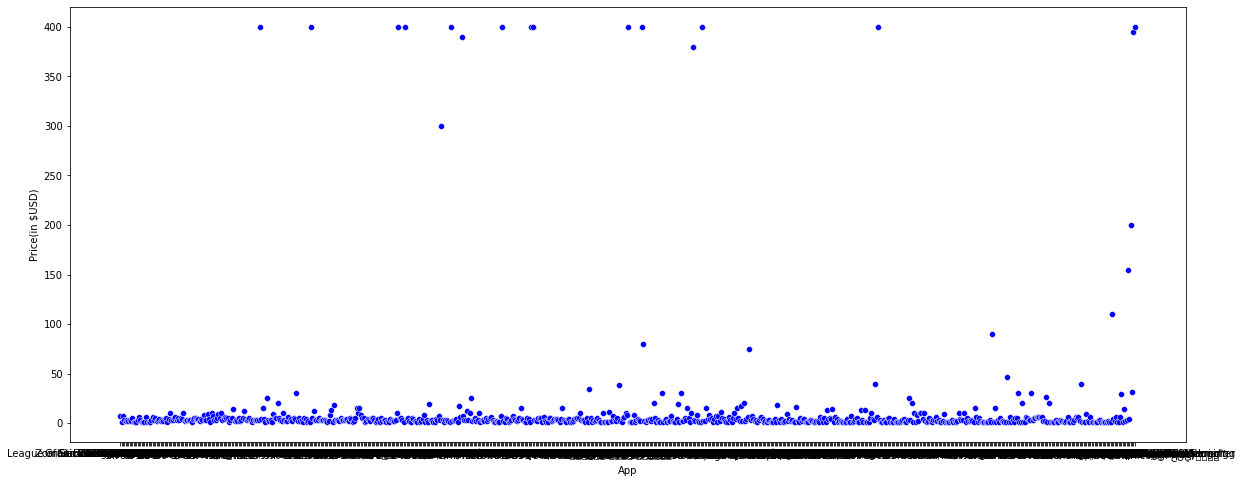

In [93]:
# Chart - 13 visualization code

# Lets see whether there is any relation with top apps in Paid App category with its price

# Defining the variable where dataset is sorted by most number of indtalls and most number of reviews
top_paid_apps = play_store_df[play_store_df['Type'] == 'Paid']
top_paid_apps = top_paid_apps.sort_values(by = ['Installs', 'Reviews'], ascending = [False,False])

# Plotting a scatter plot to see whether top paid apps have any relation with their prices
sns.scatterplot(data= top_paid_apps, x="App", y="Price(in $USD)", color = 'blue')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14

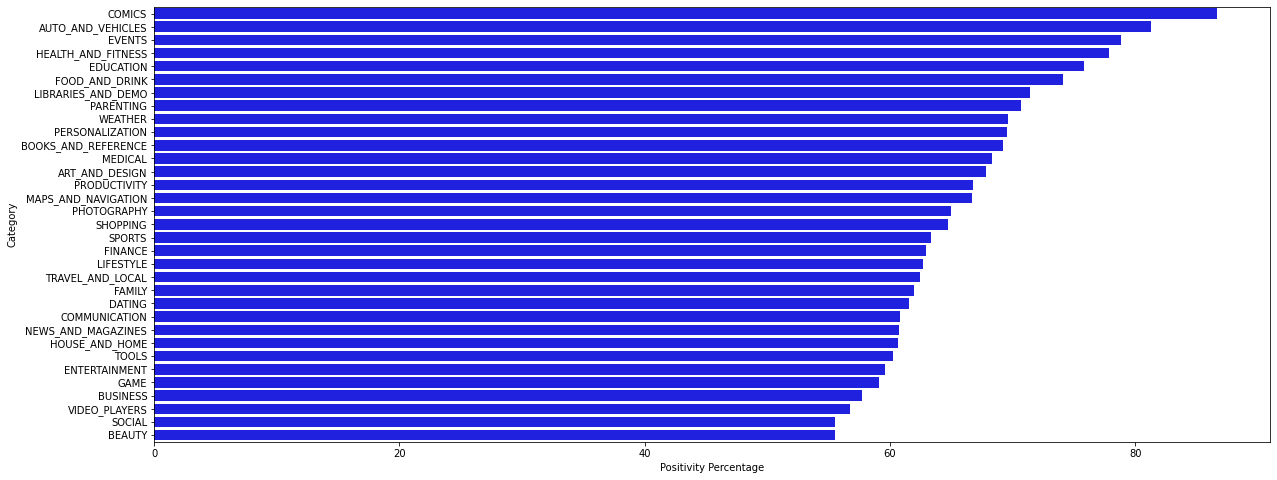

In [94]:
# Chart - 14 visualization code
top_category_of_positive_review = combined_df.groupby(['Category','Sentiment']) ['Sentiment'].count().unstack()
top_category_of_positive_review = top_category_of_positive_review.sort_values(by = 'Positive', ascending = False)
top_category_of_positive_review['Positivity Percentage'] = (top_category_of_positive_review ['Positive']
                                                            /(top_category_of_positive_review['Negative']
                                                            + top_category_of_positive_review ['Neutral']
                                                            + top_category_of_positive_review ['Positive'])*100)
top_category_of_positive_review = top_category_of_positive_review.sort_values(by = ['Positivity Percentage'], ascending = False)
top_category_of_positive_review = round(top_category_of_positive_review['Positivity Percentage'],2).reset_index()
top_category_of_positive_review
sns.barplot( x= 'Positivity Percentage', y = 'Category', data = top_category_of_positive_review, color = 'blue')
#plt.xticks(rotation = 65)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 15

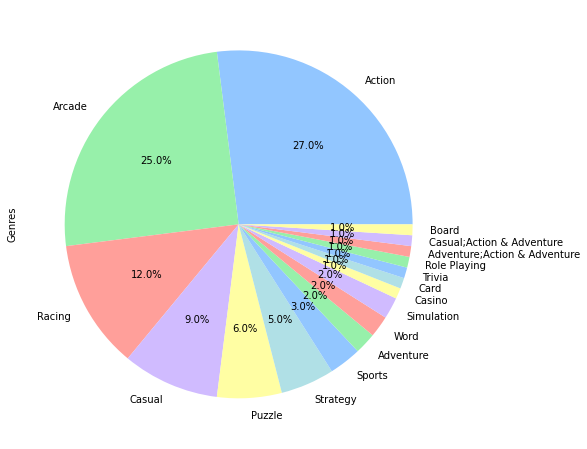

In [95]:
# Chart - 15 visualization code (Which Genre of apps are most popular in Games Category)

most_popular_games = play_store_df[play_store_df['Category'] == 'GAME'].sort_values(by = ['Installs', 'Reviews'], ascending = False).reset_index(drop= True)
most_popular_games['Genres'].head(100).value_counts().plot(kind = 'pie', autopct='%0.1f%%')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 16

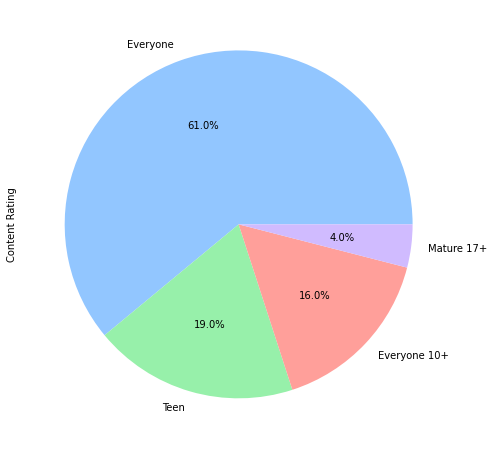

In [96]:
# Chart - 16 visualization code (Target audience of Most popular Games)
most_popular_games['Content Rating'].head(100).value_counts().plot(kind = 'pie', autopct='%0.1f%%')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 16 - Correlation Heatmap

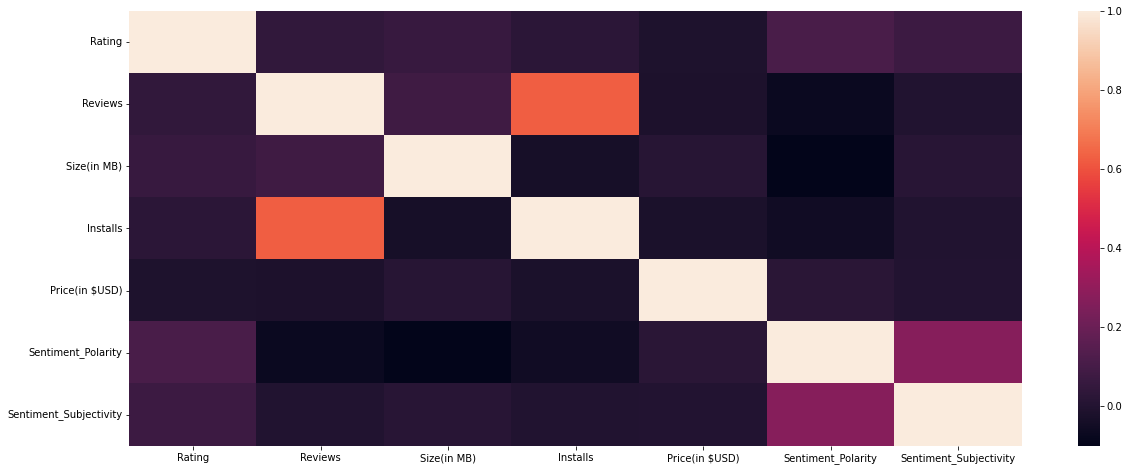

In [97]:
# Correlation Heatmap visualization code
corr_df = combined_df.corr()
#corr_df
sns.heatmap(corr_df)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 17 - Pair Plot 

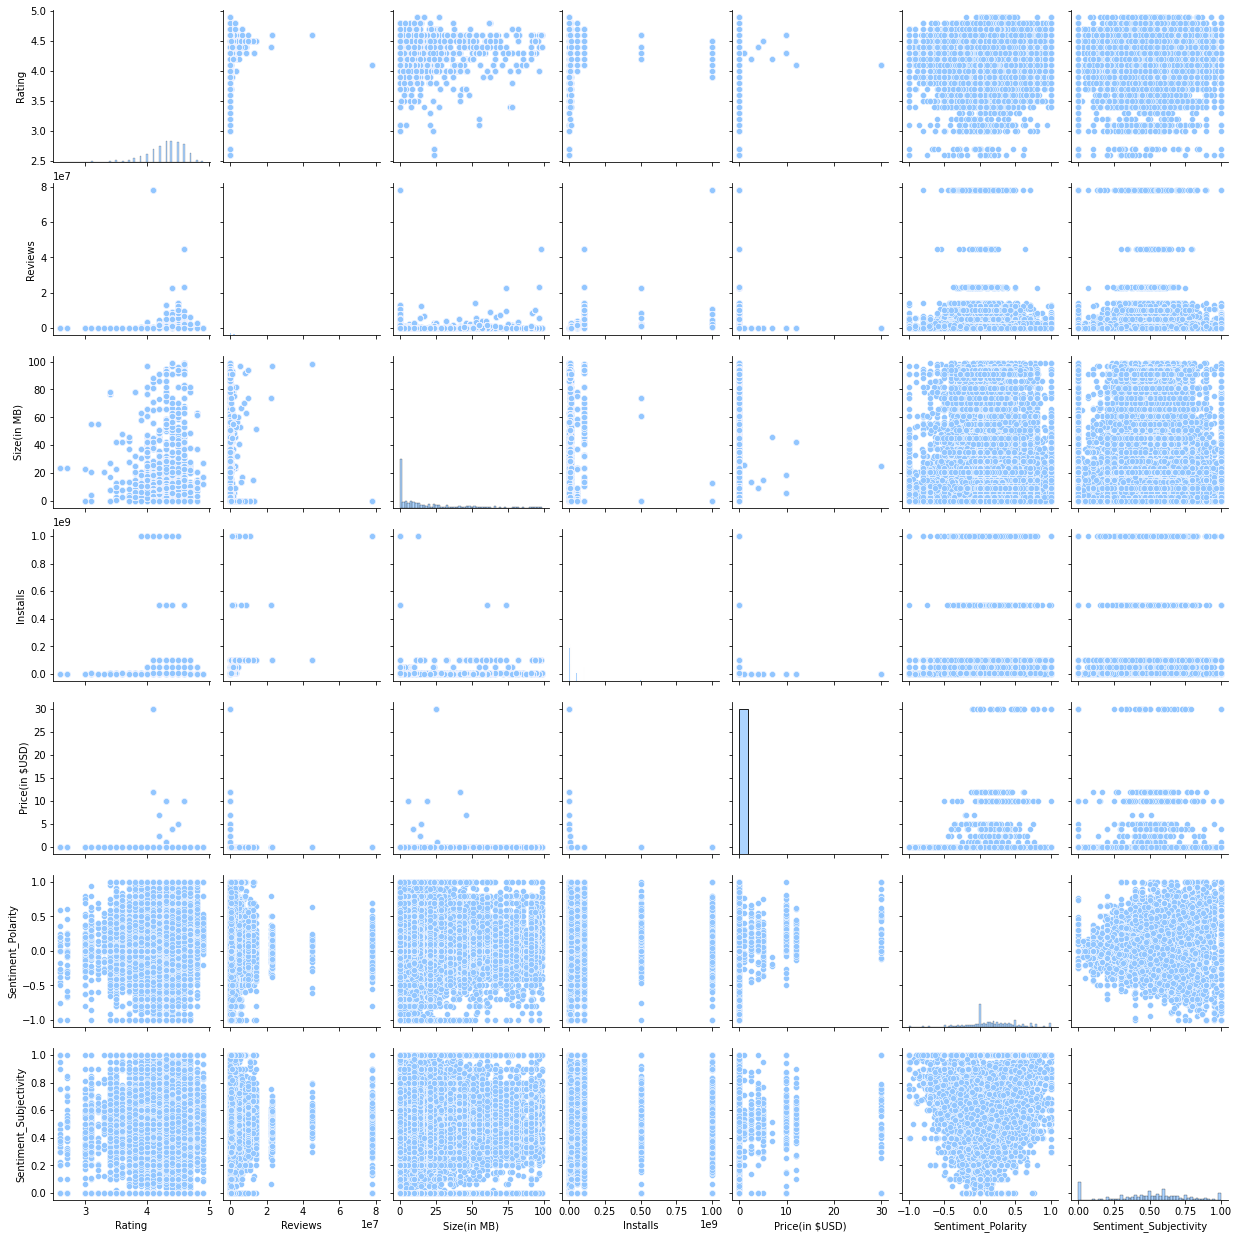

In [98]:
# Pair Plot visualization code
sns.pairplot(combined_df)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***